### Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### Cleaning

In [2]:
df = pd.read_csv('Data-Files/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df['class'] = df['class'].apply(lambda x: x.replace('p', '1'))
df['class'] = df['class'].apply(lambda x: x.replace('e', '-1'))
df['class'] = pd.to_numeric(df['class'])

In [4]:
class_col = df['class']
df = pd.get_dummies(df[[column for column in df.columns if column != 'class']])
df['class'] = class_col
df

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,-1
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,-1
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,-1
8120,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,-1
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,-1
8122,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1


### Organising Data

In [5]:
x = df[[column for column in df.columns if column != 'class']]
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20)

### Training and Prediction

In [6]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
score = accuracy_score(predictions, y_test)

### Score

In [7]:
print('Predictions')
# predicting if a mushroom is poisonous or not(1 = poisonous, -1 = edible)
print(predictions[:200])
print('\nActual Values')
print(np.array(y_test[:200]))
print(f'Score: {score}')

Predictions
[-1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1 -1  1  1  1  1
 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1
 -1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1  1
  1  1  1  1  1  1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1 -1 -1
  1  1 -1  1  1  1  1 -1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1  1  1 -1 -1
 -1  1 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1
 -1  1 -1  1 -1  1  1 -1 -1  1  1  1  1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1
  1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1  1  1
 -1 -1 -1  1 -1 -1 -1  1]

Actual Values
[-1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1  1  1  1 -1  1  1 -1  1  1  1  1
 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1
 -1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1  1
  1  1  1  1  1  1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1 -1 -1
  1  1 -1  1  1  1  1 -1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1  1  1 -1 -

### Tree

[Text(196.94117647058823, 203.85, 'X[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3376, 3123]'),
 Text(118.16470588235295, 176.67000000000002, 'X[53] <= 0.5\ngini = 0.288\nsamples = 3668\nvalue = [639, 3029]'),
 Text(78.7764705882353, 149.49, 'X[55] <= 0.5\ngini = 0.132\nsamples = 3230\nvalue = [230, 3000]'),
 Text(59.082352941176474, 122.31, 'X[22] <= 0.5\ngini = 0.051\nsamples = 3080\nvalue = [80, 3000]'),
 Text(39.38823529411765, 95.13, 'X[25] <= 0.5\ngini = 0.024\nsamples = 3037\nvalue = [37, 3000]'),
 Text(19.694117647058825, 67.94999999999999, 'gini = 0.0\nsamples = 3000\nvalue = [0, 3000]'),
 Text(59.082352941176474, 67.94999999999999, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(78.7764705882353, 95.13, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]'),
 Text(98.47058823529412, 122.31, 'gini = 0.0\nsamples = 150\nvalue = [150, 0]'),
 Text(157.5529411764706, 149.49, 'X[65] <= 0.5\ngini = 0.124\nsamples = 438\nvalue = [409, 29]'),
 Text(137.85882352941178, 122.31, 'gini =

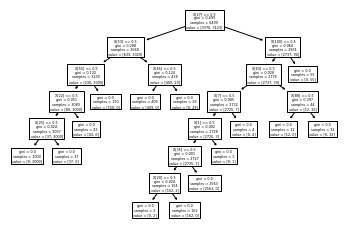

In [8]:
plot_tree(model)